# Downloading the dataset

In [ ]:
!gdown --id 1YOjtv8iyXOPISHmLyAabhl1IibnLcCx_

Downloading...
From: https://drive.google.com/uc?id=1YOjtv8iyXOPISHmLyAabhl1IibnLcCx_
To: /home/shradha/Desktop/A4/stemming-assignment.txt
100%|█████████████████████████████████████████| 190k/190k [00:00<00:00, 854kB/s]


# Preparing the dataset for calculating distances

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

f = open("stemming-assignment.txt", "r")
#f = open("test_words.txt", "r")
data = f.readlines()
dataset = []
# Strips the newline character
for line in data:
    dataset.append(line.strip('\n'))

# Writing functions for all the five distances asked

In [ ]:
def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])


def distance1(seq1, seq2):
    size_x = len(seq1)
    size_y = len(seq2)

    max_size = max(size_x, size_y)
    min_size = min(size_x, size_y)

    p = [1]*max_size
    
    for i in range(max_size):
        if(i < min_size and seq1[i]==seq2[i]):
            p[i] = 0
    
    d = 0
    for i in range(len(p)):
        d = d + ((1/2**i)*p[i])
    return d

def distance2(seq1, seq2):
    size_x = len(seq1)
    size_y = len(seq2)

    max_size = max(size_x, size_y)
    min_size = min(size_x, size_y)

    m = min_size

    for i in range(max_size):
        if(i < min_size and seq1[i]!=seq2[i]):
            m = i
            break

    if m == 0: 
        return 10000

    d = 0
    for i in range(m, max_size):
        d = d + ((1/2**(i-m)))
    
    return d*(1/m)

def distance3(seq1, seq2):
    size_x = len(seq1)
    size_y = len(seq2)

    max_size = max(size_x, size_y)
    min_size = min(size_x, size_y)

    m = min_size

    for i in range(max_size):
        if(i < min_size and seq1[i]!=seq2[i]):
            m = i
            break

    if m == 0: 
        return 10000

    d = 0
    for i in range(m, max_size):
        d = d + ((1/2**(i-m)))
    
    return d*((max_size-m+1)/m)

def distance4(seq1, seq2):
    size_x = len(seq1)
    size_y = len(seq2)

    max_size = max(size_x, size_y)
    min_size = min(size_x, size_y)

    m = min_size

    for i in range(max_size):
        if(i < min_size and seq1[i]!=seq2[i]):
            m = i
            break

    d = 0
    for i in range(m, max_size):
        d = d + ((1/2**(i-m)))
    
    return d*((max_size-m+1)/(max_size+1))


# Implementing YASS Stemmer using D2
In this section, a matrix of 23531 x 23531 has been prepared for distance between each and every element of dataset. Then, using d2, clustering has been performed and a list of stems has been prepared. A dictionary of labels and words has also been prepared for finding the stems. 

**The calculation of clusters has been performed in batched of 1000 for efficient and size-independent operations.**

In [ ]:
print("Calculating clusters for full dataset...")

d2 = []
dataset_labels = []
total_clusters = 0
last_count = 0

print("Calculating D2 based distances...")
count = 0
for i in range(len(dataset)) : 
  d = []
  for j in range(last_count, min(last_count+1000, len(dataset))) : 
    d.append(distance2(dataset[i], dataset[j]))
  d2.append(d)
  
  count = count + 1
  if count%1000==0:
    last_count = count
    print("Progress: ", count, " / ", len(dataset))

    d_clustering = AgglomerativeClustering(linkage = 'average', distance_threshold = 1, n_clusters = None).fit(d2)
    labels = d_clustering.labels_
    num_clusters = d_clustering.n_clusters_
    
    new_labels = [x+total_clusters for x in labels]
    dataset_labels.extend(new_labels)

    total_clusters = total_clusters + num_clusters
    d2.clear()

td = {}

for i in range(len(dataset_labels)):
  if dataset_labels[i] in td.keys():
    td[dataset_labels[i]].append(i)
  else:
    td[dataset_labels[i]] = [i]

stems = []

for i in range(total_clusters):
    min_size = 100
    stem = None
    for value in td[i]:
      if(len(dataset[value]) < min_size):
          min_size = len(dataset[value])
          stem = dataset[value]
    stems.append(stem)


print("Done.")

Calculating clusters for full dataset...
Calculating D2 based distances...
Progress:  1000  /  23531
Progress:  2000  /  23531
Progress:  3000  /  23531
Progress:  4000  /  23531
Progress:  5000  /  23531
Progress:  6000  /  23531
Progress:  7000  /  23531
Progress:  8000  /  23531
Progress:  9000  /  23531
Progress:  10000  /  23531
Progress:  11000  /  23531
Progress:  12000  /  23531
Progress:  13000  /  23531
Progress:  14000  /  23531
Progress:  15000  /  23531
Progress:  16000  /  23531
Progress:  17000  /  23531
Progress:  18000  /  23531
Progress:  19000  /  23531
Progress:  20000  /  23531
Progress:  21000  /  23531
Progress:  22000  /  23531
Progress:  23000  /  23531
Done.


# Printing stems

In [ ]:
print(td)
print(stems)

vil', 'secret', 'secure', 'rigorous', 'roofs', 'rescue', 'rice', 'sagittary', 'rioter', 'school', 'sable', 'salute', 'scape', 'say', 'score', 'revolts', 'scourg', 'sacks', 'scatter', 'scelera', 'rump', 'rien', 'ruff', 'sawest', 'seals', 'saunder', 'scare', 'ribald', 'sack', 'sanguis', 'searce', 'saints', 'scamble', 'scum', 'rochford', 'ripe', 'robas', 'scrap', 'scratch', 'rolls', 'roe', 'richer', 'scone', 'rougher', 'sard', 'rolled', 'resolv', 'scylla', 'scene', 'rule', 'scuse', 'safeties', 'sauce', 'saidst', 'retention', 'rhodes', 'saracens', 'scaffold', 'sallet', 'rheims', 'sand', 'roynish', 'scabs', 'rise', 'ringing', 'royal', 'rope', 'ruffs', 'sanity', 'ril', 'rural', 'rupture', 'restrain', 'rose', 'scold', 'rests', 'sea', 'sanctify', 'reside', 'scarecrow', 'saltiers', 'scion', 'rubbing', 'salad', 'schedule', 'salving', 'saying', 'scoffer', 'road', 'sawed', 'rood', 'savage', 'sealed', 'scope', 'seal', 'robustious', 'sarum', 'scuffles', 'sackbuts', 'rusts', 'resum', 'rosed', 'rude',

# Calculating all the 5 distances for the first 1000 words in the dataset

In [ ]:
size = 1000

lv = [[0 for i in range(size)] for j in range(size)]
d1 = [[0 for i in range(size)] for j in range(size)] 
d2 = [[0 for i in range(size)] for j in range(size)] 
d3 = [[0 for i in range(size)] for j in range(size)] 
d4 = [[0 for i in range(size)] for j in range(size)] 

print("Calculating Levenshtein, D1, D2, D3, D4 based distances...")
count = 0
for i in range(size) : 
  for j in range(size) : 
    lv[i][j] = levenshtein(dataset[i], dataset[j])
    d1[i][j] = distance1(dataset[i], dataset[j])
    d2[i][j] = distance2(dataset[i], dataset[j])
    d3[i][j] = distance3(dataset[i], dataset[j])
    d4[i][j] = distance4(dataset[i], dataset[j])
  count = count + 1
  if count%100==0:
    print("Progress: ", count, " / ", size)


Calculating Levenshtein, D1, D2, D3, D4 based distances...
Progress:  100  /  1000
Progress:  200  /  1000
Progress:  300  /  1000
Progress:  400  /  1000
Progress:  500  /  1000
Progress:  600  /  1000
Progress:  700  /  1000
Progress:  800  /  1000
Progress:  900  /  1000
Progress:  1000  /  1000


# Performing clustering for the 5 distances and plotting number of clusters vs. threshold
In this section, clustering using sklearn for the five distances - levenshtein, D1, D2, D3, and D4 has been performed. Then a graph for Number of Clusters Vs. Threshold has been plotted for each distance.

Clustering based on Levenshtein Distance


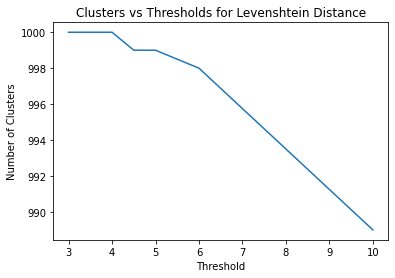

Clustering based on D1


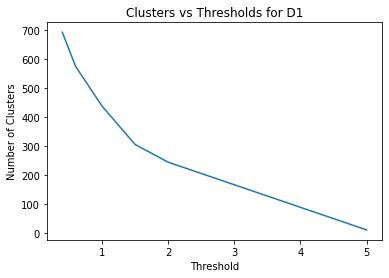

Clustering based on D2


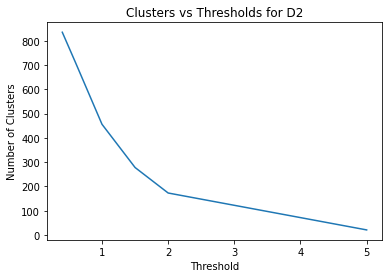

Clustering based on D3


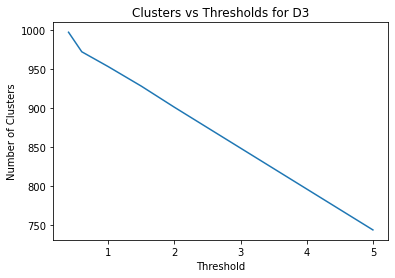

Clustering based on D4


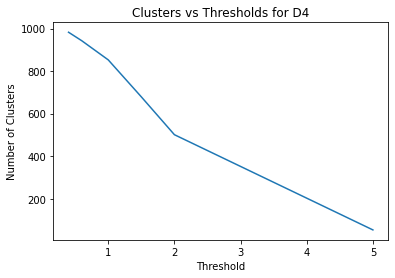

In [ ]:
thresholds = [3, 4, 4.5, 5, 6, 10]
print("Clustering based on Levenshtein Distance")
n_clusters = []
for threshold in thresholds:
    d_clustering = AgglomerativeClustering(linkage = 'complete', distance_threshold = threshold, n_clusters = None).fit(lv)
    n_clusters.append(d_clustering.n_clusters_)

plt.plot(thresholds, n_clusters)   
plt.xlabel('Threshold') 
plt.ylabel('Number of Clusters')   
plt.title('Clusters vs Thresholds for Levenshtein Distance') 
plt.show()

thresholds = [0.4, 0.6, 1, 1.5, 2, 5]
print("Clustering based on D1")
n_clusters = []
for threshold in thresholds:
    d_clustering = AgglomerativeClustering(linkage = 'complete', distance_threshold = threshold, n_clusters = None).fit(d1)
    n_clusters.append(d_clustering.n_clusters_)

plt.plot(thresholds, n_clusters)   
plt.xlabel('Threshold') 
plt.ylabel('Number of Clusters')   
plt.title('Clusters vs Thresholds for D1') 
plt.show()


print("Clustering based on D2")
n_clusters = []
for threshold in thresholds:
    d_clustering = AgglomerativeClustering(linkage = 'complete', distance_threshold = threshold, n_clusters = None).fit(d2)
    n_clusters.append(d_clustering.n_clusters_)

plt.plot(thresholds, n_clusters)   
plt.xlabel('Threshold') 
plt.ylabel('Number of Clusters')   
plt.title('Clusters vs Thresholds for D2') 
plt.show()

print("Clustering based on D3")
n_clusters = []
for threshold in thresholds:
    d_clustering = AgglomerativeClustering(linkage = 'complete', distance_threshold = threshold, n_clusters = None).fit(d3)
    n_clusters.append(d_clustering.n_clusters_)

plt.plot(thresholds, n_clusters)   
plt.xlabel('Threshold') 
plt.ylabel('Number of Clusters')   
plt.title('Clusters vs Thresholds for D3') 
plt.show()


print("Clustering based on D4")
n_clusters = []
for threshold in thresholds:
    d_clustering = AgglomerativeClustering(linkage = 'complete', distance_threshold = threshold, n_clusters = None).fit(d4)
    n_clusters.append(d_clustering.n_clusters_)

plt.plot(thresholds, n_clusters)   
plt.xlabel('Threshold') 
plt.ylabel('Number of Clusters')   
plt.title('Clusters vs Thresholds for D4') 
plt.show()

# Finding Centroids (stem) based on D2

In [ ]:
print("Finding Centroids (stem) based on D2...")

d_clustering = AgglomerativeClustering(linkage = 'average', distance_threshold = 0.8, n_clusters = None).fit(d2)
labels = d_clustering.labels_
num_clusters = d_clustering.n_clusters_

stems = []

for i in range(num_clusters):
    min_size = 100
    stem = None
    for j in range(len(labels)):
        if(i==labels[j]):
            if(len(dataset[j]) < min_size):
                min_size = len(dataset[j])
                stem = dataset[j]
    stems.append(stem)

print("Done.")

Finding Centroids (stem) based on D2...
Done.


In [ ]:
print(stems[0:10])


['antenor', 'antiates', 'adjunct', 'animal', 'anchises', 'aloes', 'amiss', 'address', 'apparel', 'abroach']
